### MNIST : 손글씨를 이용해 만든 데이터

In [1]:
import numpy as np
import tensorflow as tf

/Users/grace/workspace/keras/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/grace/workspace/keras/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

### sample image

- 28*28 = 784 pixels (0-255)

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
# pixels
for x in X_train[0]:
    for i in x:
        print(i, end=' ')
    print('\n')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0 

0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0 

0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0 

0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 0

### Preprocessing

- 784 pixels -> one of 0~9 classes
- 2-d array(28*28) to 1-d of 784


- preprocess 0~255 to 0~1 by dividing by 255

In [8]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train.shape

(60000, 784)

In [9]:
X_train = X_train.astype('float32')/255

In [10]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255
X_test.shape

(10000, 784)

- encoding for Y class values

In [11]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [12]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### Model

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy',\
             optimizer='adam',\
             metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


- Run and save and early stop at optimal stage

In [15]:
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
model_path = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
check_pointer = ModelCheckpoint(filepath=model_path, monitor='val_loss',\
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', \
                                       patience=10)

In [16]:
history = model.fit(X_train, Y_train,\
                   validation_data=(X_test, Y_test), \
                   epochs=30, batch_size=200,
                   verbose=0, callbacks=[early_stopping_callback, check_pointer])

Epoch 00000: val_loss improved from inf to 0.15373, saving model to ./model/00-0.1537.hdf5
Epoch 00001: val_loss improved from 0.15373 to 0.11380, saving model to ./model/01-0.1138.hdf5
Epoch 00002: val_loss improved from 0.11380 to 0.09073, saving model to ./model/02-0.0907.hdf5
Epoch 00003: val_loss improved from 0.09073 to 0.07809, saving model to ./model/03-0.0781.hdf5
Epoch 00004: val_loss improved from 0.07809 to 0.06912, saving model to ./model/04-0.0691.hdf5
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss improved from 0.06912 to 0.06160, saving model to ./model/07-0.0616.hdf5
Epoch 00008: val_loss improved from 0.06160 to 0.06091, saving model to ./model/08-0.0609.hdf5
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss did not improve
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss did not improve
Epoch 00013: val_loss did not improve
Epoch 00014: val_loss did not improve
Epoch 00015: val_loss did not impro

## Result

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

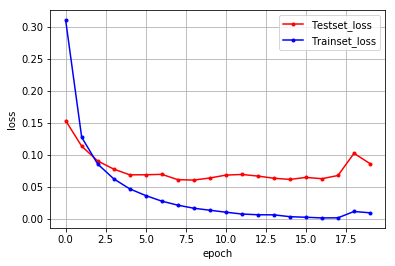

In [17]:
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']

# training set
y_loss = history.history['loss']

plt.plot(np.arange(len(y_loss)), y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(np.arange(len(y_loss)), y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## CNN :

입력된 이미지에서 다시 한번 특징을 추출하기 위해 마스크(필터, 원도, 커널)을 도입한ㄴ다. 

|   |   |   |   |
|---|---|---|---|
| 1 | 0 | 1 | 0 |
| 0 | 1 | 1 | 0 |
| 0 | 0 | 1 | 1 |
| 0 | 0 | 1 | 0 |

- 2x2 마스크 (가중치 포함)  

|   |   |
|---|---|
| 1 | 0 |
| 0 | 1 |


- 맨 왼쪽에 적용 => 새로운 가중치 2

|   |   |   |   |
|---|---|---|---|
| 1x1 | 0x0 | 1 | 0 |
| 0x0 | 1x1 | 1 | 0 |
| 0 | 0 | 1 | 1 |
| 0 | 0 | 1 | 0 |


- 전체에 적용하면 결과는 다음과 같다 = convolution
- 마스크가 여러개면 -> 여러 convolution

|   |   |   |
|---|---|---|
| 2 | 1 | 1 |
| 0 | 2 | 2 |
| 0 | 1 | 1 |

In [18]:
(cnn_X_train, _), (cnn_X_test, _) = mnist.load_data()
cnn_X_train = cnn_X_train.reshape(cnn_X_train.shape[0], 28, 28, 1).astype('float32')/255
cnn_X_test = cnn_X_test.reshape(cnn_X_test.shape[0], 28, 28, 1).astype('float32')/255

In [19]:
from keras.layers import Conv2D, Dropout, Flatten, MaxPooling2D

In [20]:
cnn_model = Sequential()

# 32개의 마스크, 크기는 (3,3)
cnn_model.add(Conv2D(32, kernel_size=(3,3), \
                    input_shape=(28, 28, 1),\
                    activation='relu'))
cnn_model.add(Conv2D(64, (3,3), activation='relu'))

### Max-pooling (sub-sampling): 
- 결과가 크고 복잡하면 다시 축소해야 한다.
- max-pooling : 정해진 구역 안에서 가장 큰 값만 넘기고 나머지는 버림

|   |   |   |   |
|---|---|---|---|
| 1 | 0 | 1 | 0 |
| 0 | 4 | 2 | 0 |
| 0 | 1 | 6 | 1 |
| 0 | 0 | 1 | 0 |

- max-pooling 적용 후

|   |   |
|---|---|
| 4 | 2 |
| 1 | 6 |


In [21]:
# 2= 전체 크기가 절반으로 줄어든다
cnn_model.add(MaxPooling2D(pool_size=2))

## 과적합 피하기: drop out

- drop out : 은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것 -> 과적합 방지

In [22]:
# 25% 노드를 끄겠다
cnn_model.add(Dropout(0.25))

In [23]:
# 2차원 배열을 1차원으로
cnn_model.add(Flatten())

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [24]:
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax'))

In [25]:
cnn_model.compile(loss='categorical_crossentropy',\
                 optimizer='adam',\
                 metrics=['accuracy'])

In [26]:
history = cnn_model.fit(cnn_X_train, Y_train,\
                   validation_data=(cnn_X_test, Y_test), \
                   epochs=30, batch_size=200,
                   verbose=0, callbacks=[early_stopping_callback, check_pointer])

Epoch 00000: val_loss improved from 0.06091 to 0.05948, saving model to ./model/00-0.0595.hdf5
Epoch 00001: val_loss improved from 0.05948 to 0.04495, saving model to ./model/01-0.0450.hdf5
Epoch 00002: val_loss improved from 0.04495 to 0.03554, saving model to ./model/02-0.0355.hdf5
Epoch 00003: val_loss improved from 0.03554 to 0.03017, saving model to ./model/03-0.0302.hdf5
Epoch 00004: val_loss improved from 0.03017 to 0.02996, saving model to ./model/04-0.0300.hdf5
Epoch 00005: val_loss improved from 0.02996 to 0.02977, saving model to ./model/05-0.0298.hdf5
Epoch 00006: val_loss improved from 0.02977 to 0.02869, saving model to ./model/06-0.0287.hdf5
Epoch 00007: val_loss improved from 0.02869 to 0.02816, saving model to ./model/07-0.0282.hdf5
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss improved from 0.02816 to 0.02656, saving model to ./model/09-0.0266.hdf5
Epoch 00010: val_loss did not improve
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss did not i

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

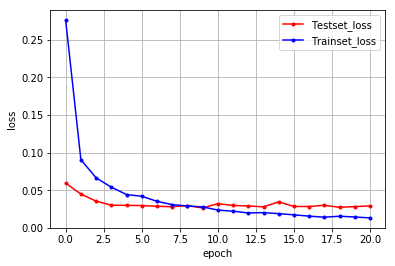

In [27]:
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']

# training set
y_loss = history.history['loss']

plt.plot(np.arange(len(y_loss)), y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(np.arange(len(y_loss)), y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()